In [2]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
%pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 95.7 MB/s eta 0:00:00


In [3]:
import csv
import pandas as pd
import numpy as np

In [ ]:
df_casas = pd.read_excel('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/Casas La Paz.xlsx',sheet_name ='Hoja1')

In [ ]:
df_casas

Dir   Bed  Bath    Mts  \
0                         Calle A, Irpavi 2, irpavi 2   2.0   1.0  304.0   
1                             1063 calle final canada   2.0   1.0  174.0   
2              calle 5-z las nieces c5 final landaeta   6.0   3.0  390.0   
3                                  19 urb villa adela   3.0   1.0  319.0   
4                       25 25 de calacoto, los pinos    3.0   2.0  135.0   
..                                                ...   ...   ...    ...   
95           Las Retamas, Seguencoma, La Paz, Bolivia   3.0   5.0  226.0   
96  Condominio Enmanuel, Lomas de Achumani, La Paz...   4.0   3.0  520.0   
97                           Sequoia, La Paz, Bolivia   4.0   5.0  600.0   
98                         San Jorge, La Paz, Bolivia  15.0   8.0  905.0   
99  Calle Claudio Sanjines, Miraflores, La Paz, Bo...   6.0   3.0  348.0   

       Precio  
0     60000.0  
1     65000.0  
2     95000.0  
3     96500.0  
4    117000.0  
..        ...  
95   250000.0  
96   590000.0  
97   450000.0  
98  1500000.0  
99   335000.0  

[100 rows x 5 columns]

In [6]:
import geopandas as gpd
from geopandas.tools import geocode
import shapely

In [ ]:
geo = geocode(df_casas_1['Dir'], provider='nominatim', user_agent='csc_user_ht')

In [ ]:
geo.to_csv('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/geo_casas.csv')

In [ ]:
df_casas_1['geo']= geo.geometry

In [ ]:
df_casas.to_csv('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/geo_casas_f.csv')

SEimportan librerias para rellenar nulos, scalar y por ultimo clusterizar

In [10]:
df_casas = pd.read_csv('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/geo_casas_f.csv')

In [ ]:
df_casas.columns

Index(['Unnamed: 0', 'Dir', 'Bed', 'Bath', 'Mts', 'Precio', 'geo'], dtype='object')

In [11]:
df_casas.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df_casas.to_csv('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/casas_f.csv', index = False)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
df_casas[['Bed', 'Bath', 'Mts', 'Precio']]

In [ ]:
df_casas.columns

Index(['Dir', 'Bed', 'Bath', 'Mts', 'Precio', 'geo'], dtype='object')

In [12]:
impt = IterativeImputer()
scaler = StandardScaler()
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

In [13]:
df_casas[['Bed', 'Bath', 'Mts', 'Precio']]=impt.fit_transform(df_casas[['Bed', 'Bath', 'Mts', 'Precio']])

In [ ]:
df_casas.to_csv('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/casas_f_i.csv', index = False)

In [14]:
df_escalado = pd.DataFrame(data = scaler.fit_transform(df_casas[['Bed', 'Bath', 'Mts', 'Precio']]), 
                                                       columns= ['Bed', 'Bath', 'Mts', 'Precio'])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11), k=(2, 12))

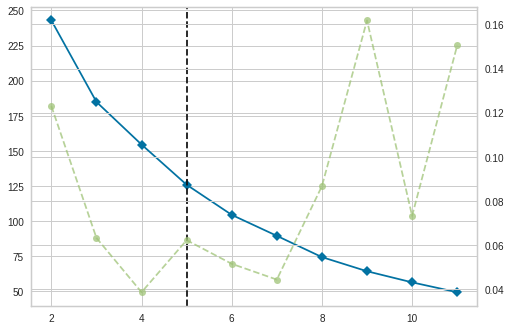

In [ ]:
visualizer.fit(df_escalado)

In [ ]:
cluster_1 = KMeans(n_clusters=5)

In [ ]:
df_casas['Cluster']=cluster_1.labels_

In [ ]:
import plotly.express as px

In [8]:
from sklearn.cluster import DBSCAN

In [55]:
cluster_2 = DBSCAN(eps=0.5, min_samples=6)

In [56]:
cluster_2.fit_predict(df_escalado)

array([-1, -1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1,
       -1,  0,  0,  0,  0, -1,  0, -1,  0, -1, -1,  0,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
        0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,
       -1,  0, -1, -1, -1, -1,  0,  0, -1,  0,  0, -1, -1, -1, -1])

In [57]:
df_casas['Cluster'] = cluster_2.labels_

In [30]:
df_casas.Cluster.value_counts()

 0    71
-1    25
 1     4
Name: Cluster, dtype: int64

In [34]:
df_casas.Cluster.value_counts()

 0    65
-1    30
 1     5
Name: Cluster, dtype: int64

In [38]:
df_casas.Cluster.value_counts()

 0    67
-1    33
Name: Cluster, dtype: int64

In [58]:
df_casas.Cluster.value_counts()

 0    51
-1    49
Name: Cluster, dtype: int64

In [ ]:
df_casas.head(5)

Dir  Bed  Bath    Mts    Precio  \
0             Calle A, Irpavi 2, irpavi 2  2.0   1.0  304.0   60000.0   
1                 1063 calle final canada  2.0   1.0  174.0   65000.0   
2  calle 5-z las nieces c5 final landaeta  6.0   3.0  390.0   95000.0   
3                      19 urb villa adela  3.0   1.0  319.0   96500.0   
4           25 25 de calacoto, los pinos   3.0   2.0  135.0  117000.0   

                                              geo  Cluster  Cluster_2  \
0                 POINT (-68.0820496 -16.5011812)        0         -1   
1                                     POINT EMPTY        0         -1   
2                                     POINT EMPTY        0          0   
3                                     POINT EMPTY        0         -1   
4  POINT (-68.07417744519364 -16.542820900000002)        0          0   

   Cluster_3  Cluster_4  
0          0         -1  
1          0         -1  
2          1         -1  
3          0         -1  
4          1         -1

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [19]:
tree_1 = DecisionTreeClassifier(criterion='entropy')

In [59]:
df_escalado['cluster'] = cluster_2.labels_

In [25]:
import matplotlib.pyplot as plt

In [61]:
tree_1.fit(df_escalado[['Bed','Bath','Mts','Precio']],df_escalado['cluster'])
tree_1.score(df_escalado[['Bed','Bath','Mts','Precio']],df_escalado['cluster'])

1.0

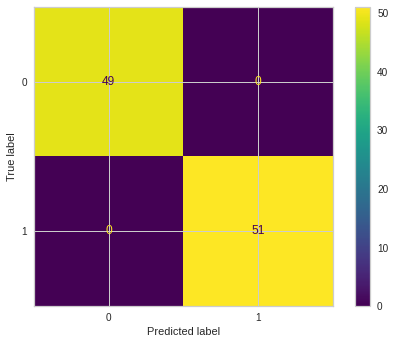

In [71]:
confusion_m = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(df_escalado['cluster'], 
                                                        tree_1.predict(df_escalado[['Bed','Bath','Mts','Precio']])))
confusion_m.plot()
plt.show()

In [62]:
from imblearn.ensemble import BalancedBaggingClassifier

In [63]:
bbc = BalancedBaggingClassifier(estimator= DecisionTreeClassifier(criterion='entropy'),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=13)

In [64]:
bbc.fit(df_escalado[['Bed','Bath','Mts','Precio']],df_escalado['cluster'])
bbc.score(df_escalado[['Bed','Bath','Mts','Precio']],df_escalado['cluster'])

0.99

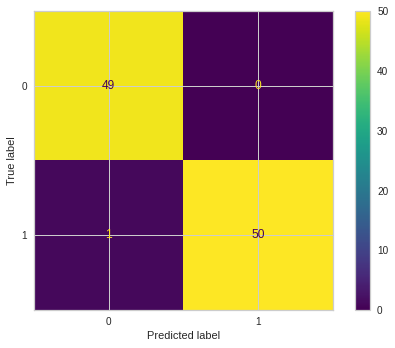

In [65]:
confusion_m = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(df_escalado['cluster'], 
                                                        bbc.predict(df_escalado[['Bed','Bath','Mts','Precio']])))
confusion_m.plot()
plt.show()

In [66]:
new_row = {'Dir':'Condominio Esmeralda, La Paz, Bolivia', 'Bed':3, 'Bath':3, 'Mts':151.2, 'Precio':160800}

In [67]:
df_casas_1 = df_casas[['Dir', 'Bed', 'Bath', 'Mts', 'Precio']].append(new_row,ignore_index=True)

<ipython-input-67-6e38f939df5c>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_casas_1 = df_casas[['Dir', 'Bed', 'Bath', 'Mts', 'Precio']].append(new_row,ignore_index=True)


In [ ]:
df_casas_1.shape

(101, 5)

In [ ]:
df_casas_1.columns

Index(['Dir', 'Bed', 'Bath', 'Mts', 'Precio', 'geo'], dtype='object')

In [68]:
df_casas_1[['Bed', 'Bath', 'Mts', 'Precio']] = scaler.fit_transform(df_casas_1[['Bed', 'Bath', 'Mts', 'Precio']])

In [ ]:
df_casas_1[df_casas_1.Mts.isnull()==True]

Empty DataFrame
Columns: [Dir, Bed, Bath, Mts, Precio]
Index: []

In [69]:
df_casas_1['Cluster']= bbc.predict(df_casas_1[['Bed', 'Bath', 'Mts', 'Precio']])

In [70]:
df_casas_1.loc[df_casas_1.index[-1]]

Dir        Condominio Esmeralda, La Paz, Bolivia
Bed                                    -0.687498
Bath                                   -0.580869
Mts                                    -1.172773
Precio                                 -0.823329
Cluster                                        0
Name: 100, dtype: object

In [73]:
df_casas_1[['Bed', 'Bath', 'Mts', 'Precio']] = scaler.inverse_transform(df_casas_1[['Bed', 'Bath', 'Mts', 'Precio']])

In [74]:
df_casas_1.to_csv('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/casas_1_f_i.csv', index = False)

In [72]:
df_casas_1.to_csv('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/casas_f.csv', index = False)

In [ ]:
df_casas_1[df_casas_1.Cluster==0].to_csv('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/casas_cluster_0.csv'
,index = False)

In [ ]:
import folium

In [ ]:
df_casas_0 = pd.read_csv('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/casas_cluster_0.csv')

In [ ]:
from shapely import wkt
df_casas_0['geo'] = df_casas_0['geo'].apply(wkt.loads)

In [ ]:
xs = [point.x for point in df_casas_0.geo]
ys = [point.y for point in df_casas_0.geo]

In [ ]:
from statistics import mean

In [ ]:
la_paz_map_original = folium.Map(location =[mean(ys), mean(xs)],
                       zoom_start = 13)

In [ ]:
la_paz_map_original

In [ ]:
df_casas_0['latitude'] = ys
df_casas_0['longitude'] = xs

In [ ]:
df_casas_0.to_csv('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/casas_cluster_0_f.csv'
,index = False)

In [ ]:
px.line_polar(data_frame= df_casas.T, line_close=True)

IndexError: ignored